# Module 2

'A picture speaks a thousand words' has never been truer in financial markets. Absolutely no one goes through the millions of rows of numbers, we always prefer the data in a plotted form to draw better inferences. This module would cover the plotting, basic technical indicators and our own customisation, and making our own trade calls!

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

## Query 2.1 
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

>Look outfor drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock

>This would be helpful if we are to train our model to take NLP inputs.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import csv
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn')

In [2]:
df = pd.read_csv("Datasets/week2.csv")

In [3]:
df['Date'].dtype 

dtype('O')

In [4]:
df['Date'] = df['Date'].astype('datetime64') #Changing Data Type
df = df.set_index('Date')

In [5]:
df.index.dtype #Now Date is Index

dtype('<M8[ns]')

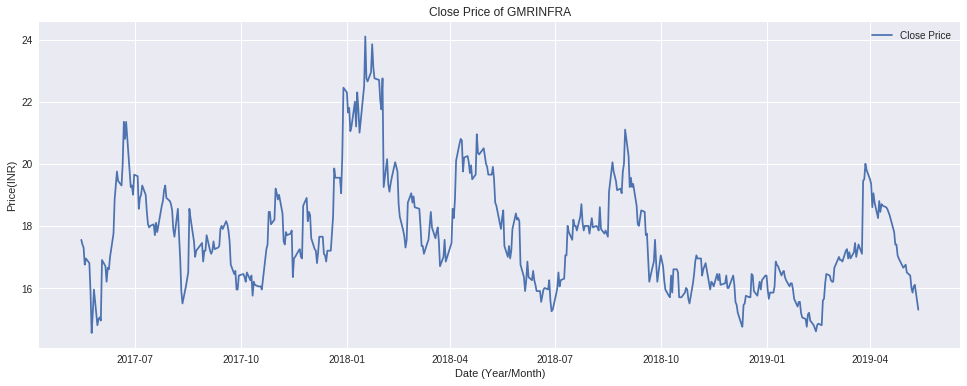

In [6]:
X = df.index
Y = df['Close Price']
plt.figure(figsize=(16.5,6))
plt.plot(X,Y, label = 'Close Price')
plt.title("Close Price of GMRINFRA")
plt.xlabel('Date (Year/Month)')
plt.ylabel('Price(INR)')
plt.legend()
plt.show()

### Explanation:
From Prelims Analysis, <B>GMRINFRA</B> isn't the stock which perform progressively so well.(INR 14.95(-2.29%) on June 30)
Over the past two years, <B>GMRINFRA</B> never been on top prices for log time. Reason Behind this is can be constant loss of company in subsequent Quaters.
Talking About this particular graph, It doesn't have any astonishing facts to reveal because Y-Domain was never too high or low.It's either going down progressively or going up. I have found Couple of news to explain some scenarios of company.
>Graph shows change around Feb, 2018. Exact Date - 2 Feb, 2018. 
The Nifty witnessed an intraday movement of about 218.85 points.The closing index was 2.33 % down as compared to the previous closing index while GMRINFRA was 15.38% down.

>GMRINFRA was in focused stock in Economic Times on 15 Feb, 2018, stating " GMR Infrastructure on Wednesday reported a consolidated net loss of Rs 565.9 crore for the quarter ended December 31, 2017. The firm had clocked a net profit of Rs 643.4 crore in the corresponding quarter of 2016-17, it said in a BSE filing." This explains Feb Graph.

>27 March, 2019 is another steep point in graph. News from The Economic Times is,"GMR Infra jumps 9% on Rs 8,000 cr airports biz deal. GIL has signed a binding term sheet with the investors pursuant to which the investors have agreed to invest Rs 8,000 crore in GMR Airports Limited.


## Query 2.2

A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.
<BR>
Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

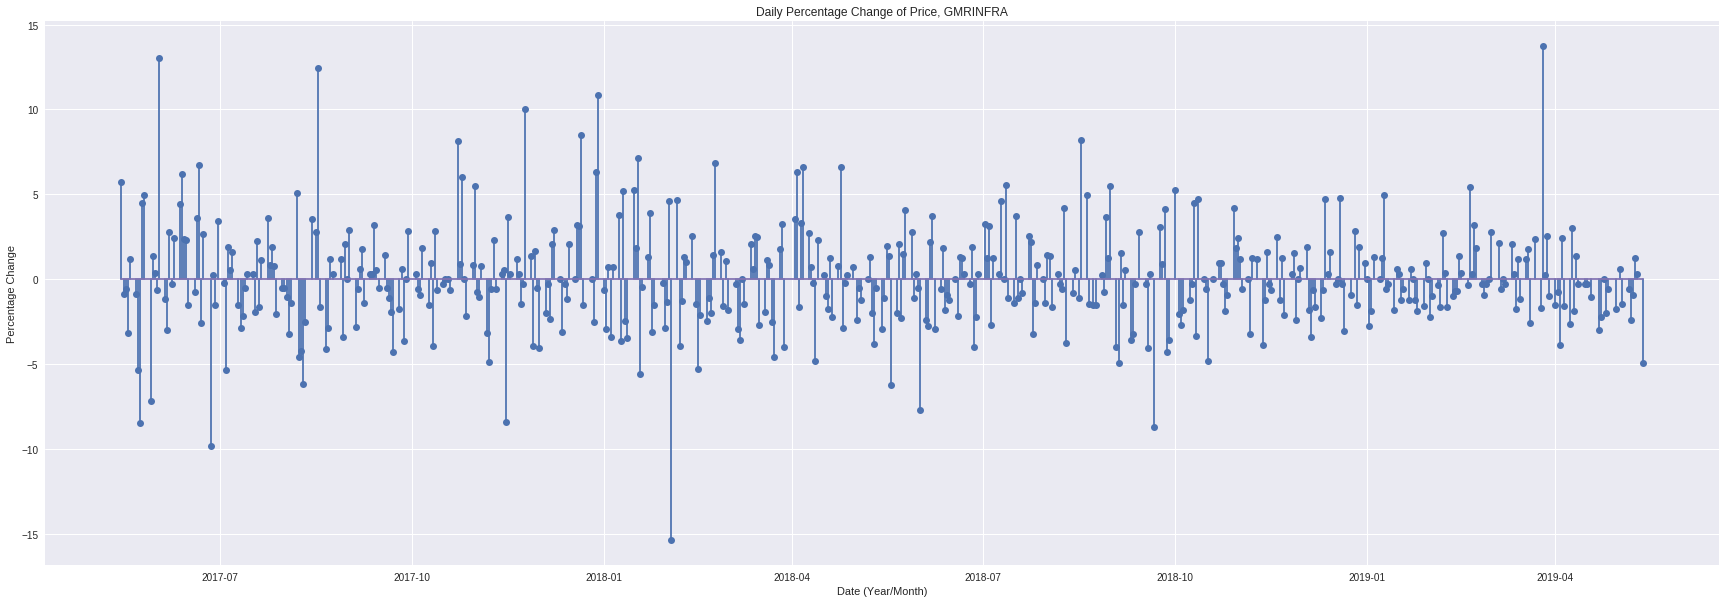

In [7]:
Y1 = df['Day_Perc_Change']
plt.figure(figsize=(30,10))
plt.title("Daily Percentage Change of Price, GMRINFRA")
plt.xlabel('Date (Year/Month)')
plt.ylabel('Percentage Change')
plt.stem(X,Y1)
plt.show()
#Double click on graph to zoom-in and zoom-out

### Explanation:
There are 7-8 big change in the graph which determine important event related to GMRINFRA. Biggest change is around -15%. 

## Query 2.3
Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change. 

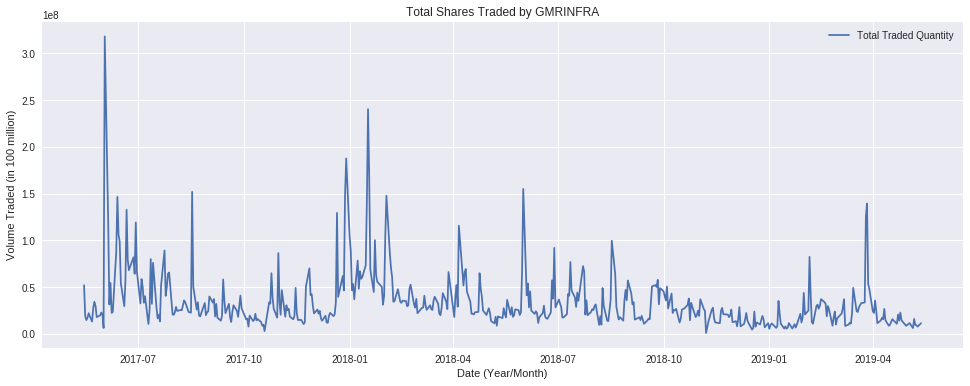

In [8]:
Y2 = df['Total Traded Quantity']
plt.figure(figsize = (16.5,6))
plt.title("Total Shares Traded by GMRINFRA")
plt.xlabel('Date (Year/Month)')
plt.ylabel('Volume Traded (in 100 million)')
plt.plot(X,Y2, label = 'Total Traded Quantity')
plt.legend()
plt.show()

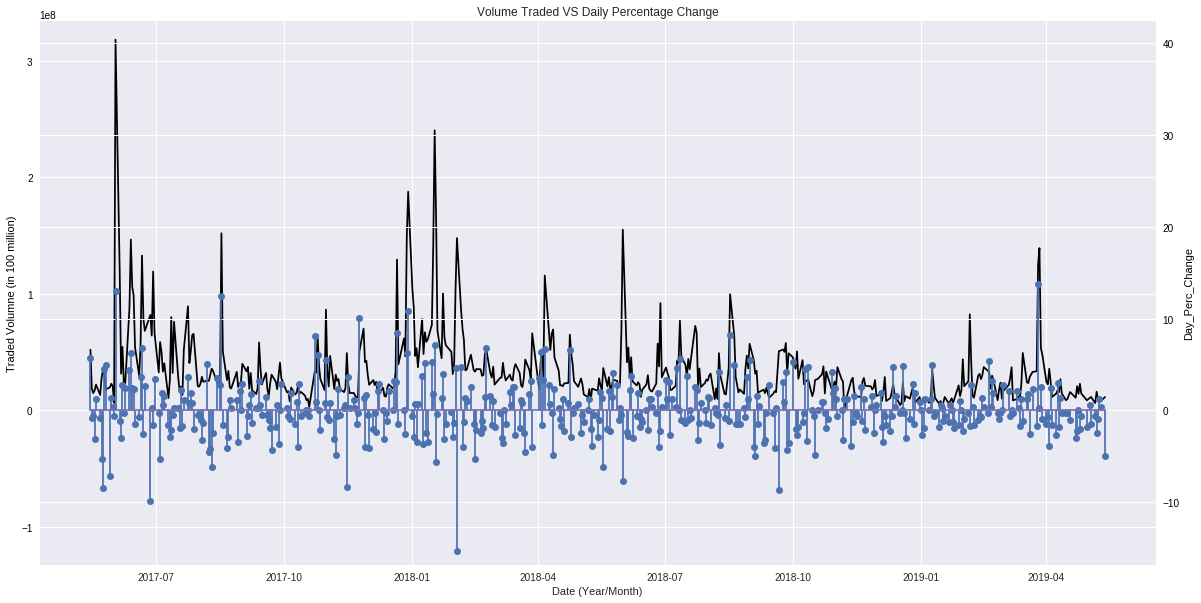

In [9]:
def align_yaxis(ax1, v1, ax2, v2):
   #adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    adjust_yaxis(ax2,(y1-y2)/2,v2)
    adjust_yaxis(ax1,(y2-y1)/2,v1)

def adjust_yaxis(ax,ydif,v):
    #shift axis ax by ydiff, maintaining point v at the same location
    inv = ax.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, ydif))
    miny, maxy = ax.get_ylim()
    miny, maxy = miny - v, maxy - v
    if -miny>maxy or (-miny==maxy and dy > 0):
        nminy = miny
        nmaxy = miny*(maxy+dy)/(miny+dy)
    else:
        nmaxy = maxy
        nminy = maxy*(miny+dy)/(maxy+dy)
    ax.set_ylim(nminy+v, nmaxy+v)

fig, ax1 = plt.subplots(figsize=(20,10))

color = 'black'
ax1.set_xlabel('Date (Year/Month)')
ax1.set_ylabel('Traded Volumne (in 100 million)', color=color)
ax1.plot(X, Y2, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Day_Perc_Change', color=color)  # we already handled the x-label with ax1
ax2.stem(X, Y1)
ax2.tick_params(axis='y', labelcolor=color)
align_yaxis(ax2, 0, ax1, 0)
plt.title("Volume Traded VS Daily Percentage Change")
plt.show()

### Explanation:
I have found there is some simultaneous relationship between Daily Percent Change and  trading  volume and indicate that information  may  flow  simultaneously  rather  than  sequentially into  the market. Apart  of  it  the  study  also found that  trading  volume  is  associated  with an  increase  in  positive percent change  and  this relationship  is  asymmetrical. This  implied  that  daily  new  information  in  market  may  have significant impact on close price(percent change, after all). The graph revealed  that  shocks  in price  impact trading  volume  in  the  expected  direction  over  a  short horizon. It is evident that Daily Percentage Change moves  in  sympathy  with  trading  activity  in  the  primary  market.

## Query 2.4

We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

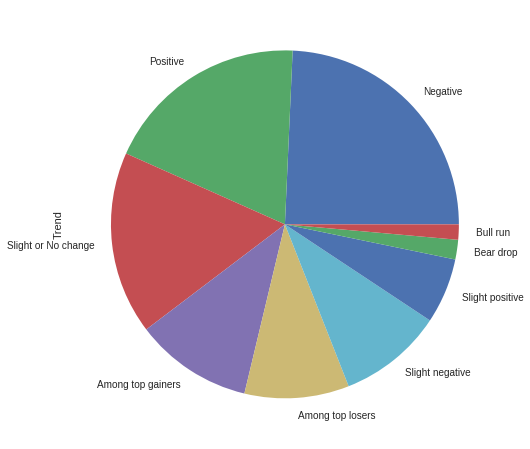

In [10]:
plt.figure(figsize = (12,8))
df.Trend.value_counts().plot(kind='pie')

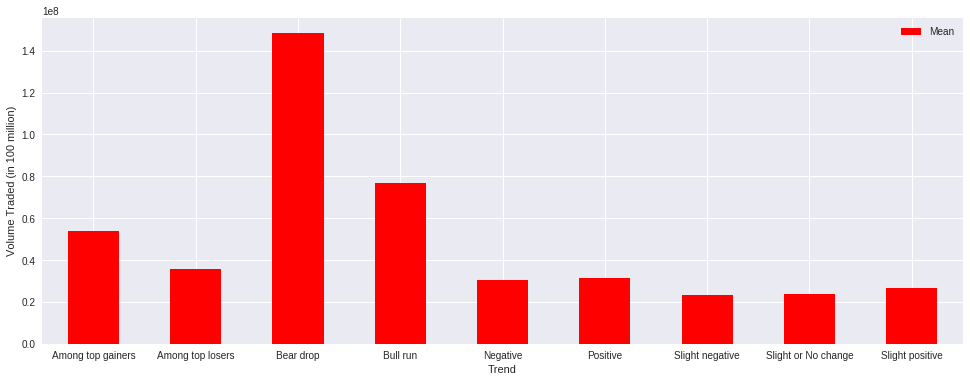

In [11]:
df.groupby(['Trend']).mean().plot.bar(y='Total Traded Quantity',rot = 0,\
                                      label = 'Mean',color = 'red',figsize = (16.5,6))
plt.xlabel('Trend')
plt.ylabel('Volume Traded (in 100 million)')
plt.show()

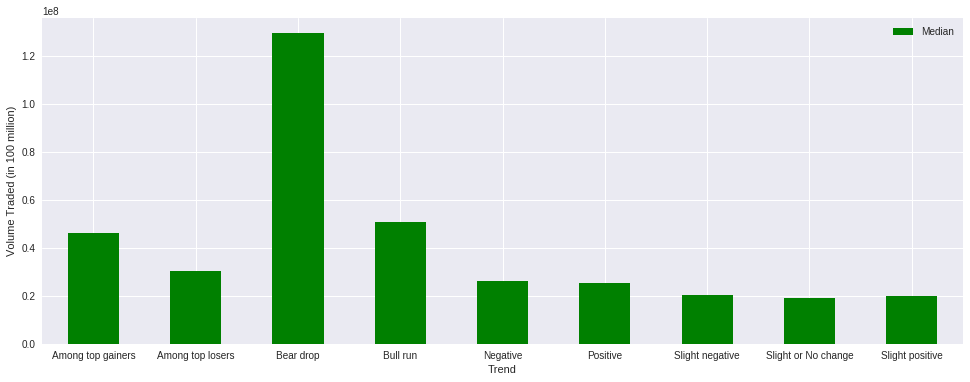

In [12]:
df.groupby(['Trend']).median().plot.bar(y='Total Traded Quantity',rot = 0,\
                                        label = 'Median',color = 'green',figsize = (16.5,6))
plt.xlabel('Trend')
plt.ylabel('Volume Traded (in 100 million)')
plt.show()

## Query 2.5
Plot the daily return (percentage) distribution as a histogram.
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes

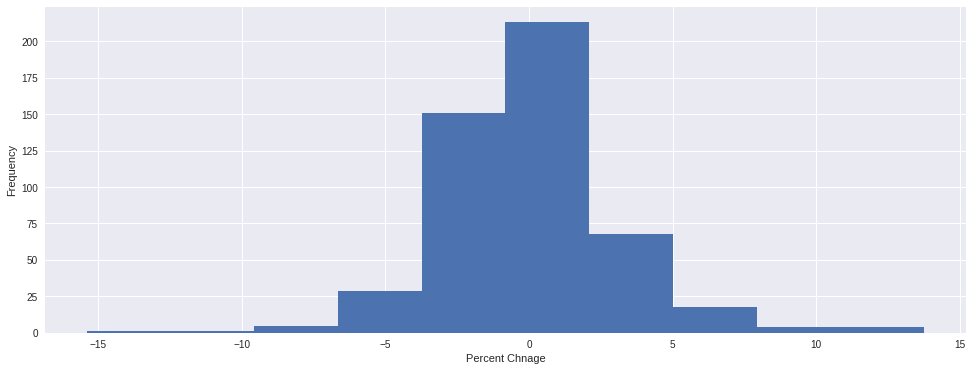

In [13]:
df['Day_Perc_Change'].hist(figsize = (16.5,6))
plt.xlabel('Percent Chnage')
plt.ylabel('Frequency')
plt.show()

### Obeservations:
    1.Maximum frequency is obtained at around -1 to +3.
    2.There is no positive percent change for 15%.
    3.There are slight number of negative change between -15 to -9.
    4.Overall, Histogram shows that there are more negative change than positive which ultimately means GMRINFRA Stock Prices drop often.

## Query 2.6
We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price.
<br>
Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.<br>
Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification. 

In [14]:
df2 = pd.read_csv("Datasets/ADANIPOWER.csv")
df3 = pd.read_csv("Datasets/JINDALSTEL.csv")
df4 = pd.read_csv("Datasets/MINDTREE.csv")
df5 = pd.read_csv("Datasets/RELINFRA.csv")
df6 = pd.read_csv("Datasets/TATAPOWER.csv")

df2 = df2[df2.Series == 'EQ']
df3 = df3[df3.Series == 'EQ']
df4 = df4[df4.Series == 'EQ']
df5 = df5[df5.Series == 'EQ']
df6 = df6[df6.Series == 'EQ']

df7 = pd.DataFrame()

df7['ADANIPOWER'] = df2['Close Price']
df7['JINDALSTEL'] = df3['Close Price']
df7['MINDTREE'] = df4['Close Price']
df7['RELINFRA'] = df5['Close Price']
df7['TATAPOWER'] = df6['Close Price']

df9 = pd.DataFrame()

df9['ADANIPOWER'] = df7['ADANIPOWER'].pct_change(periods = 1)
df9['ADANIPOWER'] = df9['ADANIPOWER']*100

df9['JINDALSTEL'] = df7['JINDALSTEL'].pct_change(periods = 1)
df9['JINDALSTEL'] = df9['JINDALSTEL']*100

df9['MINDTREE'] = df7['MINDTREE'].pct_change(periods = 1)
df9['MINDTREE'] = df9['MINDTREE']*100

df9['RELINFRA'] = df7['RELINFRA'].pct_change(periods = 1)
df9['RELINFRA'] = df9['RELINFRA']*100

df9['TATAPOWER'] = df7['TATAPOWER'].pct_change(periods = 1)
df9['TATAPOWER'] = df9['TATAPOWER']*100

df9 = df9.dropna()

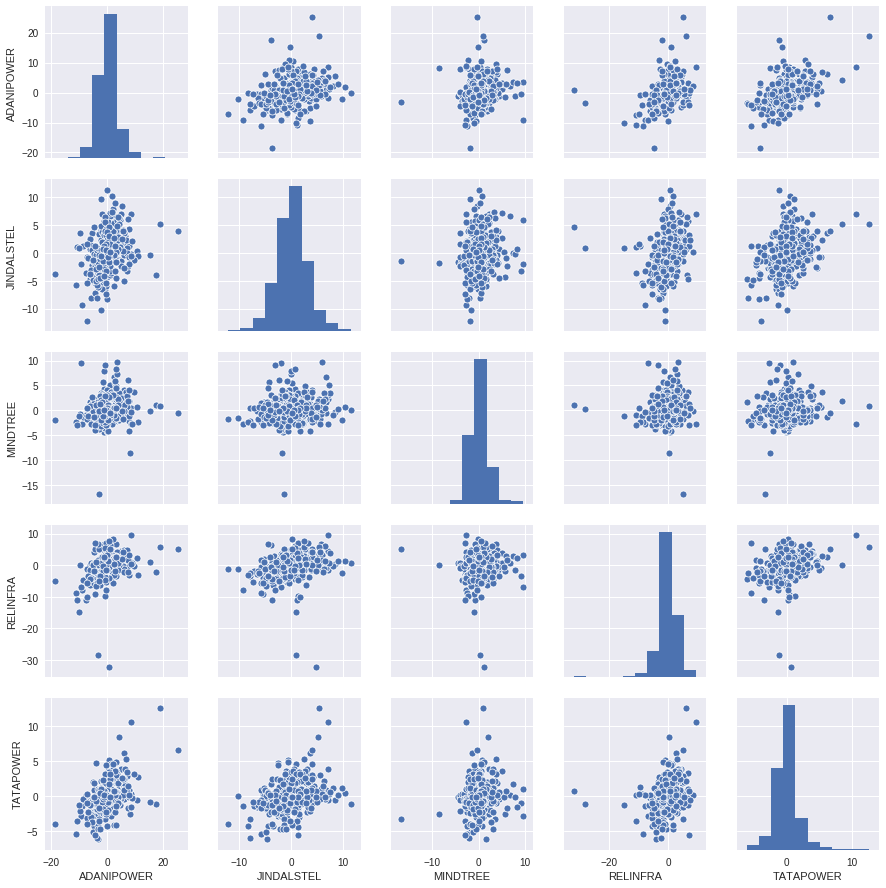

In [15]:
sns.pairplot(df9)
plt.show()

## Query 2.7
Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility a read.<br>
You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.<br>
Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

In [16]:
XRM = df['Day_Perc_Change'].rolling(7,min_periods=7).mean()
XRS = df['Day_Perc_Change'].rolling(7,min_periods=7).std()

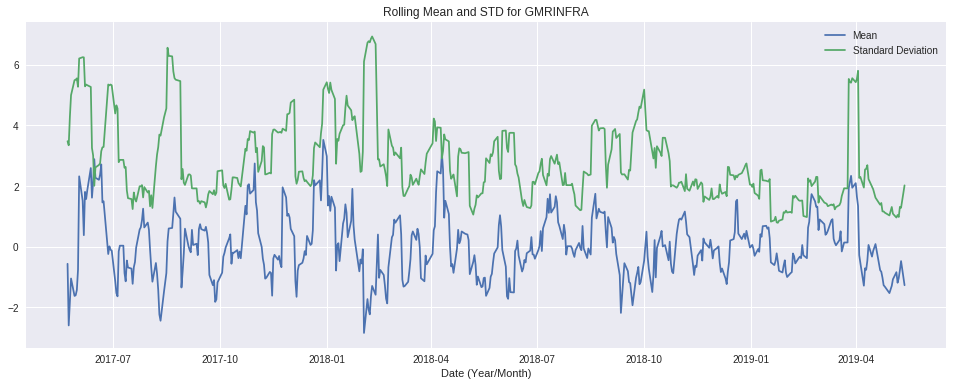

In [17]:
plt.figure(figsize=(16.5,6))
plt.title("Rolling Mean and STD for GMRINFRA")
plt.plot(X,XRM,label='Mean')
plt.plot(X,XRS,label='Standard Deviation')
plt.xlabel("Date (Year/Month)")
plt.legend()
plt.show()

## Query 2.8
Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3) 

In [18]:
df8 = pd.read_csv("Datasets/Nifty50.csv")
df8['Date'] = df8['Date'].astype('datetime64')
df8 = df8.set_index('Date')
df8['Day_Perc_Change'] = df8['Close'].pct_change(periods = 1)
df8['Day_Perc_Change'] = df8['Day_Perc_Change']*100

In [19]:
XGS = df['Day_Perc_Change'].rolling(7,min_periods=7).std()
XNS = df8['Day_Perc_Change'].rolling(7,min_periods=7).std()

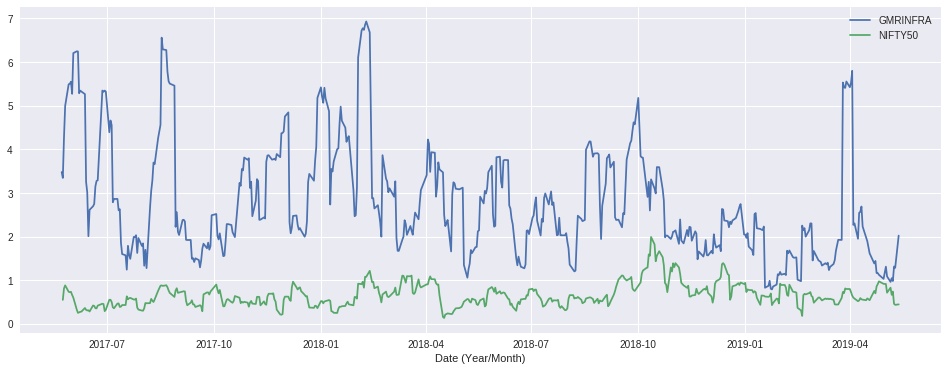

In [20]:
plt.figure(figsize = (16.5,6))
plt.plot(X,XGS,label = "GMRINFRA")
plt.plot(X,XNS,label = 'NIFTY50')
plt.xlabel("Date (Year/Month)")
plt.legend()
plt.show()

### Query 2.9
Trade Calls - Using Simple Moving Averages. Study about moving averages here. 
<br>
Plot the 21 day and 34 day Moving average with the average price and decide a Call !
Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average.
One of the most widely used technical indicators.

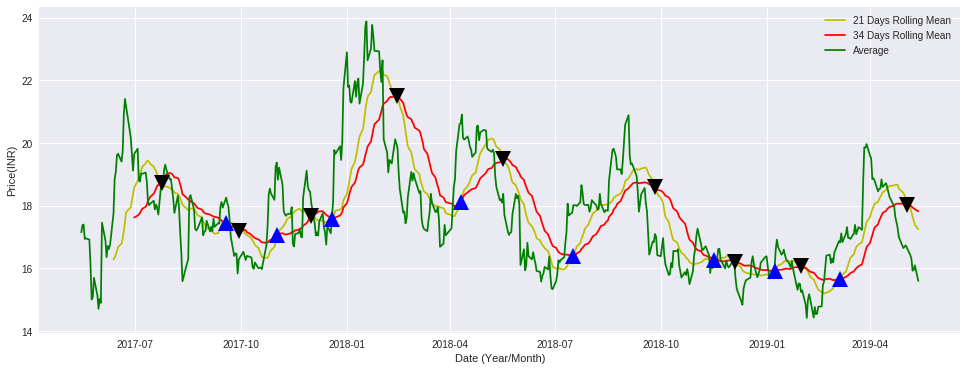

In [21]:
X21 = df['Close Price'].rolling(21,min_periods=21).mean()
X34 = df['Close Price'].rolling(34,min_periods=34).mean()
XC = df['Average Price']
plt.figure(figsize=(16.5,6))
plt.plot(X,X21,'y', label = '21 Days Rolling Mean')
plt.plot(X,X34,'r', label = '34 Days Rolling Mean')
plt.plot(X,XC,'g', label = 'Average')
idx = np.argwhere(np.diff(np.sign(X21 - X34))).flatten()
for j in idx:
    if X34[j] > X21[j]:
        plt.plot(X[j], X34[j], '^',color = 'blue', markersize=16)
    elif X34[j]<X21[j]:
        plt.plot(X[j], X34[j], 'v',color = 'black', markersize=16)
    else:
        pass
plt.legend()
plt.ylabel("Price(INR)")
plt.xlabel("Date (Year/Month)")
plt.show()

### Explanation:
1. Blue Triangle Represent, Investor should buy
2. Black Triangle Represent, Investor should sell

## Query 2.10
Trade Calls - Using Bollinger Bands<br>
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average
The bollinger bands comprise the following data points-

    The 14 day rolling mean of the closing price (we call it the average) 
    Upper band which is the rolling mean + 2 standard deviations away from the average. 
    Lower band which is the rolling mean - 2 standard deviations away from the average. 
    Average Daily stock price.

Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market.<br>
Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands.
Save to a new csv file. 

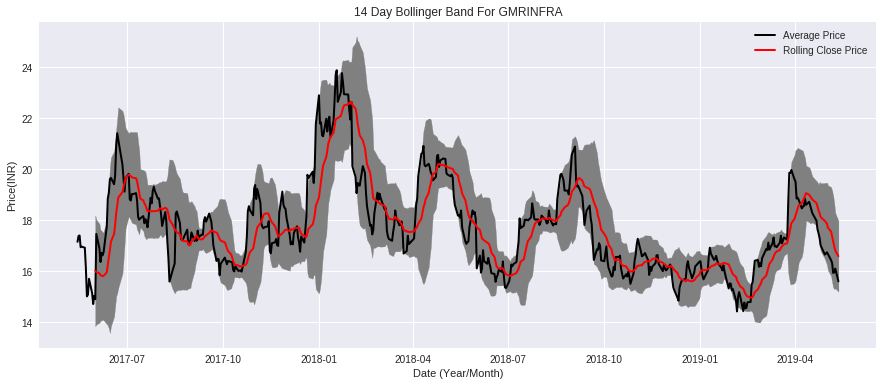

In [22]:
X14 = df['Close Price'].rolling(14,min_periods=14).mean()
X141 = 2*(df['Close Price'].rolling(14,min_periods=14).std())
X142 = X14 - X141
X143 = X14 + X141 

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)


x_axis = X

ax.fill_between(x_axis, X143, X142, color='grey')


ax.plot(x_axis, XC, color='black',label = 'Average Price', lw=2)
ax.plot(x_axis, X14, color='red', label = 'Rolling Close Price', lw=2)


ax.set_title('14 Day Bollinger Band For GMRINFRA')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(INR)')
ax.legend()
plt.show()

In [23]:
df['Lower Band'] = X142
df['Middle Band'] = X14
df['Upper Band'] = X143

In [24]:
df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change,Trend,Lower Band,Middle Band,Upper Band
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,GMRINFRA,EQ,16.60,16.70,17.70,16.70,17.60,17.55,17.15,51996656,8.916579e+08,11922,29960644,57.62,5.722892,Among top gainers,NaN,NaN,NaN
2017-05-16,GMRINFRA,EQ,17.55,17.60,17.70,17.05,17.35,17.40,17.38,18797177,3.267238e+08,10494,5716554,30.41,-0.854701,Slight negative,NaN,NaN,NaN
2017-05-17,GMRINFRA,EQ,17.40,17.40,17.70,17.25,17.25,17.30,17.40,14686157,2.555702e+08,8448,4250771,28.94,-0.574713,Slight negative,NaN,NaN,NaN
2017-05-18,GMRINFRA,EQ,17.30,17.15,17.25,16.65,16.75,16.75,16.94,17050095,2.889004e+08,9429,5476423,32.12,-3.179191,Among top losers,NaN,NaN,NaN
2017-05-19,GMRINFRA,EQ,16.75,16.85,17.35,16.60,17.00,16.95,16.96,22080313,3.744406e+08,9355,2110450,9.56,1.194030,Positive,NaN,NaN,NaN


In [25]:
df.to_csv('Datasets/week3.csv', index=True)
print('Exported')

Exported


### Observations:
1. Average price is strictly lying inside band on almost every date.
2. 2*Standard Deviation Bollinger is quite impressive for Average Price Mapping